In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder


In [15]:
train_csv=pd.read_csv("./mnist_train.csv")
test_csv=pd.read_csv("./mnist_test.csv")
train_csv.shape

(60000, 785)

# making x_train , Y_train and X_test,Y_test

In [16]:
X_train = train_csv.iloc[:,1:].values
Y_train = train_csv.iloc[:,0].values
X_test = test_csv.iloc[:,1:].values
Y_test = test_csv.iloc[:,0].values

# Normalization

In [17]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

# validation

Text(0.5, 1.0, 'Label: 3')

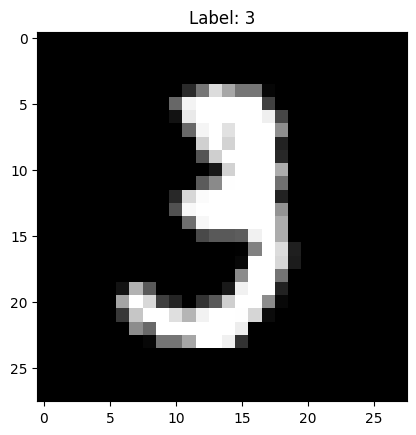

In [18]:
idx = 10

image = X_train[idx].reshape(28, 28)

plt.imshow(image, cmap="gray")
plt.title(f"Label: {Y_train[idx]}")


# one-hot encoding

In [19]:
encoder = OneHotEncoder(sparse_output=False)

Y_train_oh = encoder.fit_transform(Y_train.reshape(-1, 1))
Y_test_oh  = encoder.transform(Y_test.reshape(-1, 1))


# making ANN
input layer size=784/
hidden layer size=128/
output layer size = 10(0-9)

In [ ]:
# ReLU
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# Softmax function
def softmax(Z):
    Z_shifted = Z - np.max(Z, axis=1, keepdims=True)  # numerical stability
    exp_Z = np.exp(Z_shifted)
    return exp_Z / np.sum(exp_Z, axis=1, keepdims=True)

def softmax_jacobian(A):
    n = A.shape[0]
    J = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if i == j:
                J[i, j] = A[i] * (1 - A[i])
            else:
                J[i, j] = -A[i] * A[j]
    return J



In [ ]:
n_input = 784    # example: 3 features
n_hidden = 128   # hidden layer neurons
n_output = 10 
learning_rate=0.1
W1 = np.random.randn(n_input, n_hidden) * np.sqrt(2 / n_input)
b1 = np.zeros((1, n_hidden))
W2 = np.random.randn(n_hidden, n_output) * 0.01
b2 = np.zeros((1, n_output))

# forward propaganation

In [38]:
def forwrd(x):
    Z1=np.dot(x,W1)+b1
    A1=relu(Z1)

    Z2=np.dot(A1,W2)+b2
    A2 = softmax(Z2) 
    return Z1, A1, Z2, A2

In [39]:
def cross_entropy(Y, A2):
    m = Y.shape[0]
    return -np.sum(Y * np.log(A2 + 1e-8)) / m
def d_cross_entropy(Y, A2):
    eps = 1e-8
    m = Y.shape[0]
    return -(Y / (A2 + eps)) / m


In [ ]:
# Z1,A1,Z2,A2 = forwrd(X_train)
# m = X_train.shape[0]
# dZ2 = A2 - Y_train_oh 
# dW2 = A1.T @ dZ2 / m

# dA1 = dZ2 @ W2.T
# dZ1 = dA1 * relu_derivative(Z1)
# dW1 = X_train.T @ dZ1 / m
epochs = 10
batch_size = 64

for epoch in range(epochs):
    for i in range(0, X_train.shape[0], batch_size):
        X_batch = X_train[i:i+batch_size]
        Y_batch = Y_train_oh[i:i+batch_size]

        # forward
        Z1, A1, Z2, A2 = forwrd(X_batch)

        # loss
        loss = cross_entropy(Y_batch, A2)

        # backward
        dZ2 = A2 - Y_batch
        dW2 = A1.T @ dZ2 / batch_size

        dA1 = dZ2 @ W2.T
        dZ1 = dA1 * relu_derivative(Z1)
        dW1 = X_batch.T @ dZ1 / batch_size

        # update
        W2 -= learning_rate * dW2
        W1 -= learning_rate * dW1

    print(f"Epoch {epoch+1}, Loss: {loss}")


Epoch 1, Loss: 0.10902621083811354
Epoch 2, Loss: 0.055991759032690734
Epoch 3, Loss: 0.03916093812774976
Epoch 4, Loss: 0.03144100542945161
Epoch 5, Loss: 0.029026881128842587
Epoch 6, Loss: 0.027744193094033337
Epoch 7, Loss: 0.027279800087475464
Epoch 8, Loss: 0.0258801734874556
Epoch 9, Loss: 0.022813458813906742
Epoch 10, Loss: 0.021206365127302736


In [ ]:
Z1, A1, Z2, A2 = forwrd(X_test)

y_pred = np.argmax(A2, axis=1)
y_true = np.argmax(Y_test_oh, axis=1)

accuracy = np.mean(y_pred == y_true)
print("Test accuracy:", accuracy)
